In [98]:
import locale
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import split_data_fields as sdf

%matplotlib inline
pd.options.display.float_format = '{:,.2f}'.format
#pd.set_option('display.float_format', lambda x: "0:,.2f".format(x))
#locale.setlocale(locale.LC_ALL, '') 

# Box Office Mojo
bomojo_df = pd.read_csv('~/Projects/dc-ds/lectures/dc-ds-100719/module-1/week-3/project/data/bom.movie_gross.csv.gz')

In [96]:
## Using Brad's new dataframe
top_studios_df = pd.read_csv('imdb_bom_top_studios.csv.gz')
genres_counts = top_studios_df.groupby('genres').count().sort_values(ascending=False,by='tconst')['tconst']
genres_list = [str(x).split(",") for x in top_studios_df.genres]
#len(genres_list)
#len(top_studios_df)
top_studios_df['genres_list'] = [str(x).split(",") for x in top_studios_df.genres



,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,genres_list
0,tt2614684,'71,'71,2014,99.00,"Action,Drama,Thriller",7.20,"46,103.00",RAtt.,"1,300,000.00",355000,2015,"[Action, Drama, Thriller]"
1,tt2353767,"1,000 Times Good Night",Tusen ganger god natt,2013,117.00,"Drama,War",7.10,"6,848.00",FM,"53,900.00",NaN,2014,"[Drama, War]"
2,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.00,"Drama,Horror,Mystery",7.20,"260,383.00",Par.,"72,100,000.00",38100000,2016,"[Drama, Horror, Mystery]"
3,tt1715873,10 Years,10 Years,2011,100.00,"Comedy,Drama,Romance",6.10,"22,484.00",Anch.,"203,000.00",NaN,2012,"[Comedy, Drama, Romance]"
4,tt3346824,1001 Grams,1001 Gram,2014,93.00,Drama,6.30,"1,301.00",KL,"11,000.00",NaN,2015,[Drama]
5,tt6580564,102 Not Out,102 Not Out,2018,102.00,"Comedy,Drama",7.50,"4,802.00",Sony,"1,300,000.00",10900000,2018,"[Comedy, Drama]"
6,tt1413492,12 Strong,12 Strong,2018,130.00,"Action,Drama,History",6.60,"50,155.00",WB,"45,800,000.00",21600000,2018,"[Action, Drama, History]"
7,tt2024544,12 Years a Slave,12 Years a Slave,2013,134.00,"Biography,Drama,History",8.10,"577,301.00",FoxS,"56,700,000.00",131100000,2013,"[Biography, Drama, History]"
8,tt1542344,127 Hours,127 Hours,2010,94.00,"Adventure,Biography,Drama",7.60,"323,949.00",FoxS,"18,300,000.00",42400000,2010,"[Adventure, Biography, Drama]"
9,tt1436045,13 Assassins,Jûsan-nin no shikaku,2010,141.00,"Action,Adventure,Drama",7.60,"58,142.00",Magn.,"803,000.00",16800000,2011,"[Action, Adventure, Drama]"


In [2]:
# convert foreign_gross to a float, must strip all punctuation from the strings first
def strip_punctuation_from_number_string(s, punc="$.,"):
    result = ''
    for char in s:
        if char not in punc:
            result = result + char
    return result
        
bomojo_df['foreign_gross'] = bomojo_df['foreign_gross'].apply(lambda x: strip_punctuation_from_number_string(str(x)))
bomojo_df['foreign_gross'] = bomojo_df['foreign_gross'].astype(float)

In [3]:
# highest foreign grossing films 2010-2018
bomojo_title_millions_df = bomojo_df.groupby(['title']).sum()/1000000
LIST_OF_MOJO_500_GROSSING_MOVIES = list(bomojo_title_millions_df.sort_values('foreign_gross', ascending=False).head(500).index)
#LIST_OF_MOJO_500_GROSSING_MOVIES

In [4]:
# Check imdb for mojo titles
# IMDB Title Basics
imdb_title_basics_df = pd.read_csv('~/Projects/dc-ds/lectures/dc-ds-100719/module-1/week-3/project/data/imdb.title.basics.csv.gz')

In [34]:
top500 = imdb_title_basics_df[imdb_title_basics_df.primary_title.isin(LIST_OF_MOJO_500_GROSSING_MOVIES)]
#top500

In [76]:
# THIS USES THE CLEANED DATASET
genres_list = [str(x).split(",") for x in top_studios_df.genres.dropna()]
#genres_list = [x for x in genres_list]
flatten_genres = list(set([val for sublist in genres_list for val in sublist]))
print("There are" , len(flatten_genres), "unique genres in the IMDB dataset\n", flatten_genres)


There are 21 unique genres in the IMDB dataset
 ['Sci-Fi', 'Animation', 'Mystery', 'War', 'Horror', 'Crime', 'Western', 'Documentary', 'Drama', 'Action', 'Comedy', 'Thriller', 'Family', 'Fantasy', 'Musical', 'Adventure', 'Sport', 'Music', 'Biography', 'Romance', 'History']


In [41]:
top500_genres_list = [str(x).split(",") for x in top500.genres.dropna()]
#genres_list = [x for x in genres_list]
top500_flatten_genres = list(set([val for sublist in top500_genres_list for val in sublist]))
print("There are" , len(top500_flatten_genres), "unique genres in the Top 500 grossing dataset\n", top500_flatten_genres, "\n")


There are 21 unique genres in the Top 500 grossing dataset
 ['Sci-Fi', 'Animation', 'Mystery', 'War', 'Horror', 'Crime', 'Western', 'Documentary', 'Drama', 'Action', 'Comedy', 'Thriller', 'Family', 'Fantasy', 'Musical', 'Adventure', 'Sport', 'Music', 'Biography', 'Romance', 'History'] 



In [48]:
# List of genres to ignore
[x for x in flatten_genres if x not in top500_flatten_genres]

['News', 'Talk-Show', 'Game-Show', 'Adult', 'Reality-TV', 'Short']

In [63]:
top500_grouped = top500.groupby('genres')#.count().sort_values(by='tconst', ascending=False)
top500_grouped.filter(lambda x: x['tconst'].count() > 1).sort_values('genres')

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
101136,tt5911540,Dangal,Dangal,2013,nan,Action
1019,tt10075374,The Little Prince,The Little Prince,2019,93.00,Action
5439,tt10467112,Safe House,Safe House,2019,nan,Action
29605,tt2133340,The Foreigner,The Foreigner,2011,145.00,Action
34177,tt2267968,Kung Fu Panda 3,Kung Fu Panda 3,2016,95.00,"Action,Adventure,Animation"
62741,tt3606756,Incredibles 2,Incredibles 2,2018,118.00,"Action,Adventure,Animation"
11943,tt1646971,How to Train Your Dragon 2,How to Train Your Dragon 2,2014,102.00,"Action,Adventure,Animation"
530,tt0983193,The Adventures of Tintin,The Adventures of Tintin,2011,107.00,"Action,Adventure,Animation"
33314,tt2245084,Big Hero 6,Big Hero 6,2014,102.00,"Action,Adventure,Animation"
199,tt0481499,The Croods,The Croods,2013,98.00,"Action,Adventure,Animation"


In [70]:
top500[top500.duplicated(subset='primary_title', keep=False)].sort_values('primary_title')


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
113035,tt6644200,A Quiet Place,A Quiet Place,2018,90.00,"Drama,Horror,Sci-Fi"
108191,tt6347308,A Quiet Place,A Quiet Place,2016,80.00,Documentary
42473,tt2543164,Arrival,Arrival,2016,116.00,"Drama,Mystery,Sci-Fi"
121497,tt7325124,Arrival,Arrival,2012,nan,Documentary
133274,tt8358722,Brave,Brave,2014,nan,Drama
5935,tt1217209,Brave,Brave,2012,93.00,"Adventure,Animation,Comedy"
117464,tt7002100,Coco,Coco,2017,98.00,Horror
5231,tt10453328,Coco,Coco,2018,nan,NaN
38424,tt2380307,Coco,Coco,2017,105.00,"Adventure,Animation,Comedy"
11037,tt1617630,Daddy's Home,Daddy's Home,2010,90.00,"Drama,Thriller"


In [71]:
## Using Brad's new dataframe
top_studios_df = pd.read_csv('imdb_bom_top_studios.csv.gz')
top_studios_df

In [137]:
top_studios_df['ct'] = 1
top_studios_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,genres_list,ct
0,tt2614684,'71,'71,2014,99.00,"Action,Drama,Thriller",7.20,"46,103.00",RAtt.,"1,300,000.00",355000,2015,"[Action, Drama, Thriller]",1
1,tt2353767,"1,000 Times Good Night",Tusen ganger god natt,2013,117.00,"Drama,War",7.10,"6,848.00",FM,"53,900.00",NaN,2014,"[Drama, War]",1
2,tt1179933,10 Cloverfield Lane,10 Cloverfield Lane,2016,103.00,"Drama,Horror,Mystery",7.20,"260,383.00",Par.,"72,100,000.00",38100000,2016,"[Drama, Horror, Mystery]",1
3,tt1715873,10 Years,10 Years,2011,100.00,"Comedy,Drama,Romance",6.10,"22,484.00",Anch.,"203,000.00",NaN,2012,"[Comedy, Drama, Romance]",1
4,tt3346824,1001 Grams,1001 Gram,2014,93.00,Drama,6.30,"1,301.00",KL,"11,000.00",NaN,2015,[Drama],1
5,tt6580564,102 Not Out,102 Not Out,2018,102.00,"Comedy,Drama",7.50,"4,802.00",Sony,"1,300,000.00",10900000,2018,"[Comedy, Drama]",1
6,tt1413492,12 Strong,12 Strong,2018,130.00,"Action,Drama,History",6.60,"50,155.00",WB,"45,800,000.00",21600000,2018,"[Action, Drama, History]",1
7,tt2024544,12 Years a Slave,12 Years a Slave,2013,134.00,"Biography,Drama,History",8.10,"577,301.00",FoxS,"56,700,000.00",131100000,2013,"[Biography, Drama, History]",1
8,tt1542344,127 Hours,127 Hours,2010,94.00,"Adventure,Biography,Drama",7.60,"323,949.00",FoxS,"18,300,000.00",42400000,2010,"[Adventure, Biography, Drama]",1
9,tt1436045,13 Assassins,Jûsan-nin no shikaku,2010,141.00,"Action,Adventure,Drama",7.60,"58,142.00",Magn.,"803,000.00",16800000,2011,"[Action, Adventure, Drama]",1


In [99]:
long_df = sdf.multifield_to_col(top_studios_df.set_index('tconst'), 'tconst', 'genres')

In [112]:
df_grouped_genre = top_studios_df.groupby('genres').sum().sort_values(ascending=False, by='domestic_gross')

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,year
genres,,,,,,
"Action,Adventure,Sci-Fi",92643,"6,043.00",314.30,"19,707,556.00","10,976,899,999.00",92644
"Adventure,Animation,Comedy",151065,"7,084.00",482.90,"8,037,681.00","9,645,132,598.00",151076
"Action,Adventure,Fantasy",62467,"3,655.00",194.90,"7,763,568.00","4,378,787,000.00",62470
"Action,Adventure,Comedy",62476,"3,497.00",196.60,"5,800,311.00","3,172,295,299.00",62481
Comedy,146995,"7,488.00",419.50,"3,784,537.00","2,276,656,699.00",147014
"Action,Adventure,Animation",44311,"2,205.00",161.80,"2,749,710.00","2,184,660,400.00",44318
"Action,Comedy,Crime",76515,"4,123.00",225.90,"3,499,792.00","1,811,605,100.00",76522
"Action,Adventure,Drama",70481,"4,064.00",214.50,"3,827,897.00","1,753,360,700.00",70484
"Action,Adventure,Thriller",32220,"2,000.00",104.80,"3,592,880.00","1,746,498,000.00",32220


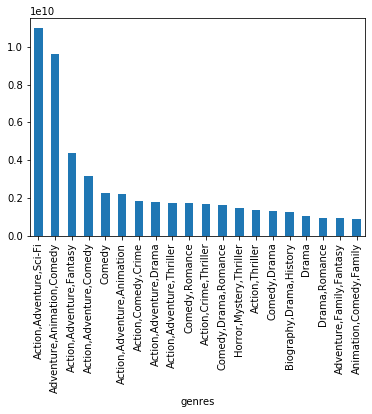

In [144]:
top_studios_df.groupby('genres').sum().sort_values(ascending=False, 
                                                   by='domestic_gross')['domestic_gross'][:20].plot.bar()

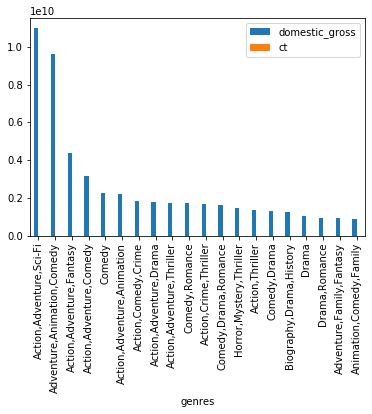

In [141]:
top20_grossing_genres = top_studios_df.groupby('genres').sum() \
                              .sort_values(ascending=False, by='domestic_gross')[['domestic_gross','ct']][:20]
top20_grossing_genres.plot.bar()

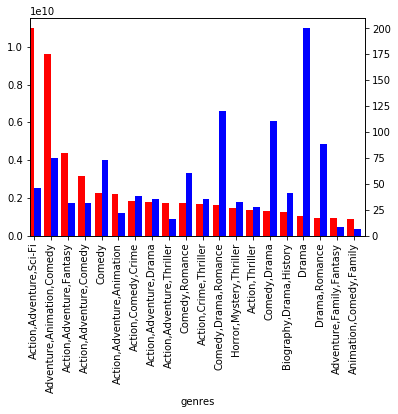

In [142]:
df = top20_grossing_genres
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

df.domestic_gross.plot(kind='bar', color='red', ax=ax, width=width, position=1)
df.ct.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)


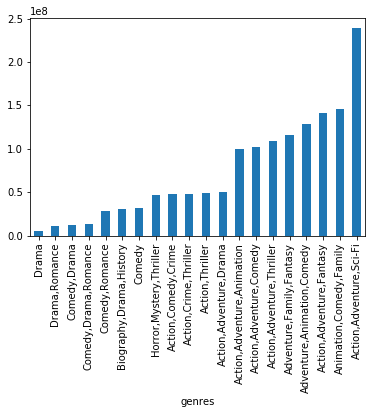

In [147]:
(df.domestic_gross / df.ct).sort_values().plot.bar()
plot

In [135]:
top20_counts_df = top_studios_df[top_studios_df.genres.isin(top20_grossing_genres)].groupby('genres').count().sort_values(ascending=False, by='tconst')

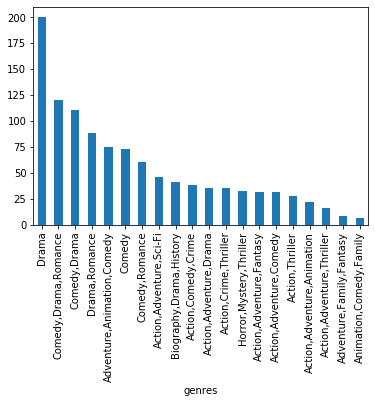

In [136]:
top20_counts_df['tconst'].plot.bar()

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)


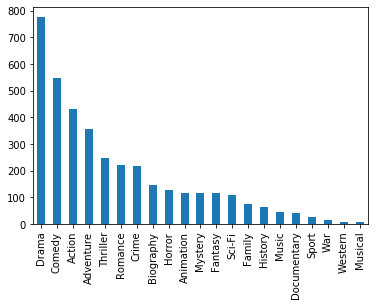

In [107]:
long_df.genre.value_counts().plot.bar();